In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

# create dataframe, open file for manipulation
df = pd.read_csv("C:/Users/Owner/medical_clean.csv")

In [2]:
#  minimum was far too low as zip must have 5 digits
df['Zip'] = df['Zip'].astype("str").str.zfill(5)

In [3]:
# Area Replacing capitalized letters using map in pandas
df['Area'] = df['Area'].map({'Rural': 'rural', 'Urban': 'urban', 'Suburban': 'suburban'})

In [4]:
# Timezone renamed by using rename in pandas
df.rename(columns={'Timezone': 'TimeZone'}, inplace=True)

In [5]:
# Children Data mismatch -  Had to fill in NAs with 0s before changing float64 to Int64
# Children Missing data - Simply replaced with 0
df['Children'] = df['Children'].fillna(0).astype(np.int64)

In [6]:
#  Age data type mismatch changing to Int64
#  Missing values Int64 allows dealing with NA

In [7]:
df['Age'] = df['Age'].astype("Int64")
df['Age'].dropna(inplace=True)

In [8]:
#  Setting outliers to NaN
df['Income'] = np.where(df['Income'] > 127029, np.nan, df['Income'])

In [9]:
# Setting NaN and outliers to Median value
df['Income'].fillna(df['Income'].median(), inplace=True)

In [15]:
#  Changed data type
df['Income'] = np.int64(df['Income'])

In [22]:
# Change Prefer not to answer to nonbinary as per data dictionary
df['Gender'] = df['Gender'].map({'Male': 'male', 'Female': 'female', 'Nonbinary': 'nonbinary'})

In [23]:
# ReAdmis Yes/No to yes/no
df['ReAdmis'] = df['ReAdmis'].map({'Yes':'yes', 'No':'no'})

In [24]:
#  Null values rows filled with No to become no
df.Soft_drink.fillna('No', inplace=True)

In [26]:
#  Soft drink changed from Yes / No to yes/no per data dictionary
df['Soft_drink'] = df['Soft_drink'].map({'Yes': 'yes', 'No': 'no'})

In [30]:
#  Changing words to match data dictionary
df['Initial_admin'] = df['Initial_admin'].map({'Emergency Admission': 'emergency admission', 'Elective Admission': 'elective admission', 'Observation Admission': 'observation'})

In [33]:
# HighBlood Yes/No to yes/no
df['HighBlood'] = df['HighBlood'].map({'Yes': 'yes', 'No': 'no'})

In [35]:
# Stroke Changing Yes/No to yes/no
df['Stroke'] = df['Stroke'].map({'Yes': 'yes', 'No': 'no'})

In [37]:
#  Change to lowercase
df['Complication_risk'] = df['Complication_risk'].map({'High': 'high', 'Medium': 'medium', 'Low':'low'})

In [39]:
# Replace null values with No
#  Changed 1,0s to yes,no
df['Overweight'] = df['Overweight'].fillna(0)

In [41]:
df['Overweight'] = df['Overweight'].astype(str)
df.Overweight.replace({'1':'yes', '0':'no'}, inplace=True)

In [42]:
#  Yes/No replaced with yes/no
df['Arthritis'] = df['Arthritis'].map({'Yes': 'yes', 'No': 'no'})

In [43]:
#  Converting Yes/No to yes/no
df['Diabetes'] = df['Diabetes'].map({'Yes': 'yes', 'No': 'no'})

In [47]:
#  Yes/No replacement
df['Hyperlipidemia'] = df['Hyperlipidemia'].map({'Yes': 'yes', 'No': 'no'})

In [49]:
# replacing Yes/No 
df['BackPain'] = df['BackPain'].map({'Yes': 'yes', 'No': 'no'})

In [51]:
#  Replace null values with 0
df['Anxiety'] = df['Anxiety'].fillna(0)

In [53]:
# Remap values and replace Yes / No for yes/no
df['Anxiety'] = df['Anxiety'].astype(str)
df.Anxiety.replace({'1':'yes', '0':'no'}, inplace=True)

In [55]:
#  Changed Yes/No to yes/no
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].map({'Yes': 'yes', 'No': 'no'})

In [57]:
#  Changed Yes/No to yes/no
df['Reflux_esophagitis'] = df['Reflux_esophagitis'].map({'Yes': 'yes', 'No': 'no'})

In [59]:
#  Yes/No to yes/no
df['Asthma'] = df['Asthma'].map({'Yes': 'yes', 'No': 'no'})

In [61]:
# replacing Blood Work and Intravenous with lower case for data dictionary as well as the s in CT Scan
df['Services'] = df['Services'].map({'Blood Work': 'blood work', 'Intravenous': 'intravenous', 'CT Scan': 'CT scan', 'MRI': 'MRI'})


In [63]:
#  Dropping null values rows
df['Initial_days'] = np.where(df['Initial_days'] == '', np.nan, df['Initial_days'])

In [65]:
#  Filling null values with median
df['Initial_days'].fillna(df['Initial_days'].median(), inplace=True)

In [67]:
#df.to_csv('testd207.csv', index=False)
#df.head(20)

In [69]:
#   ###  Univariate and Bivariate ###

In [72]:
# univariates
# 2 continuous - Initial_days, Additional_charges
# 2 categorical - Initial_admin, Area

In [74]:
# Initial_days - violin plot

Text(0, 0.5, 'Frequency')

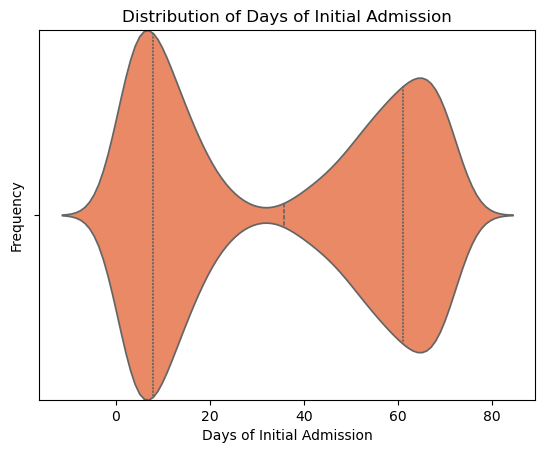

In [76]:
plt.title("Distribution of Days of Initial Admission")
seaborn.violinplot(data=df, x="Initial_days", cut=3, density_norm="count", width=1, color="coral", inner="quartile")
plt.xlabel("Days of Initial Admission")
plt.ylabel("Frequency")

In [77]:
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [79]:
df.Initial_days.value_counts(normalize=True, bins=4)

(0.93, 18.747]      0.4588
(54.237, 71.981]    0.3683
(36.492, 54.237]    0.1308
(18.747, 36.492]    0.0421
Name: proportion, dtype: float64

In [80]:
# Additional_charges - Histogram / tables of values / describe

Text(0, 0.5, 'Frequency')

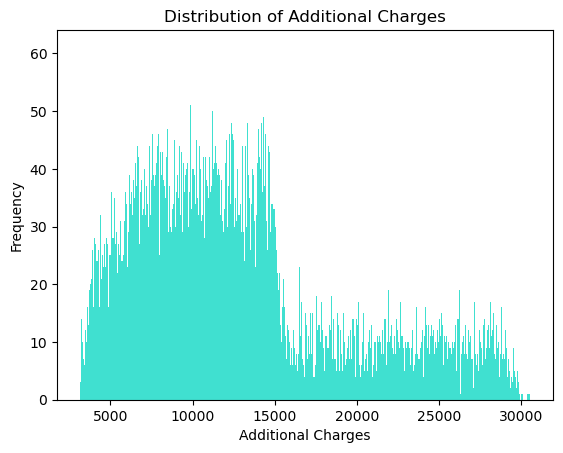

In [81]:
plt.title("Distribution of Additional Charges")
plt.hist(data=df, x="Additional_charges", bins=500, color="turquoise")
plt.xlabel("Additional Charges")
plt.ylabel("Frequency")

In [83]:
df.Additional_charges.describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

In [133]:
print('median: ', statistics.median(df.Additional_charges))

median:  11573.977735


In [85]:
# Services - horizontal bar chart histogram

Text(0, 0.5, 'Service Provided')

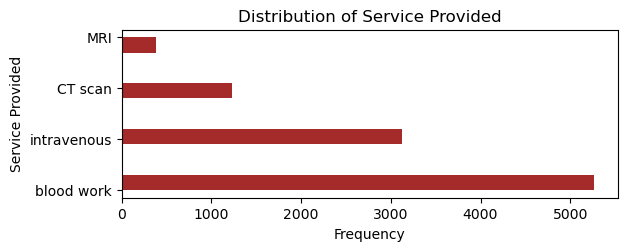

In [88]:
plt.subplot(2,1,1)
plt.title("Distribution of Service Provided")
plt.hist(data=df, x="Services", orientation="horizontal", color="brown")
plt.xlabel("Frequency")
plt.ylabel("Service Provided")


In [89]:
df.Services.value_counts()

Services
blood work     5265
intravenous    3130
CT scan        1225
MRI             380
Name: count, dtype: int64

In [90]:
# Area - Pie chart (Training,2023)

([<matplotlib.patches.Wedge at 0x2857adf3390>,
 [Text(0.5441941502119151, 0.9674464981977721, 'Rural'),
  Text(-1.1097614035074985, -0.02301363259172737, 'Suburban'),
  Text(0.564135245208488, -0.9559557652493965, 'Urban')],
 [Text(0.2990616501164578, 0.5316597872978747, '33.7%'),
  Text(-0.6098688794050217, -0.012647131424282608, '33.3%'),
  Text(0.3100202698893493, -0.5253450601821008, '33.0%')])

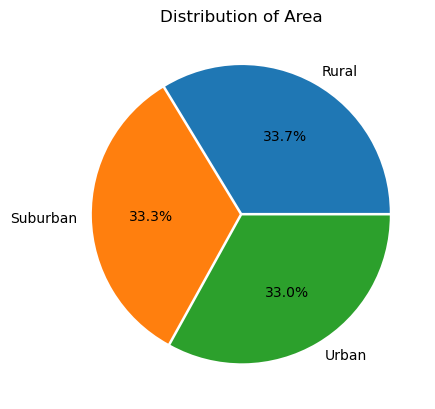

In [92]:
area_counts = df["Area"].value_counts()
area_labels = ["Rural", "Suburban", "Urban"]
explode = [0.01, 0.01, 0.01]

plt.title("Distribution of Area")
plt.pie(area_counts, labels=area_labels, explode=explode, autopct='%.01f%%', )


In [93]:
df.Area.value_counts(normalize=True)

Area
rural       0.3369
suburban    0.3328
urban       0.3303
Name: proportion, dtype: float64

In [94]:
# bivariates
# categorical - Gender, Marital
# continuous - VitD_levels, Income

In [95]:
# Categorical - Gender, Marital - bar chart same as above (Waskom, 2012)

Text(0, 0.5, 'Frequency')

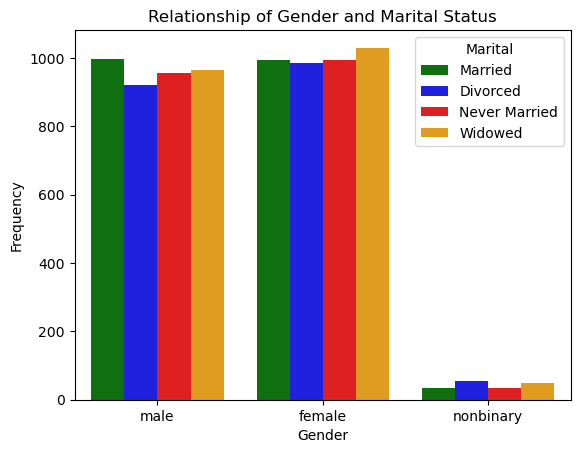

In [99]:
ax = seaborn.countplot(data=df, x='Gender', hue='Marital', order=['male', 'female', 'nonbinary'], hue_order=['Married', 'Divorced', 'Never Married', 'Widowed'], palette={'Married': 'green', 'Divorced':'blue', 'Never Married':'Red', 'Widowed':'orange'})
plt.title("Relationship of Gender and Marital Status")
plt.ylabel("Frequency")


In [100]:
gender_marital_cross = pd.crosstab(df.Gender, df.Marital, margins=True)
print(gender_marital_cross)

Marital    Divorced  Married  Never Married  Separated  Widowed    All
Gender                                                                
female          984      993            994       1017     1030   5018
male            922      997            957        927      965   4768
nonbinary        55       33             33         43       50    214
All            1961     2023           1984       1987     2045  10000


In [101]:
# Continuous - VitD_levels, Income - scatterplot

Text(0.5, 0, 'Vitamin D Levels')

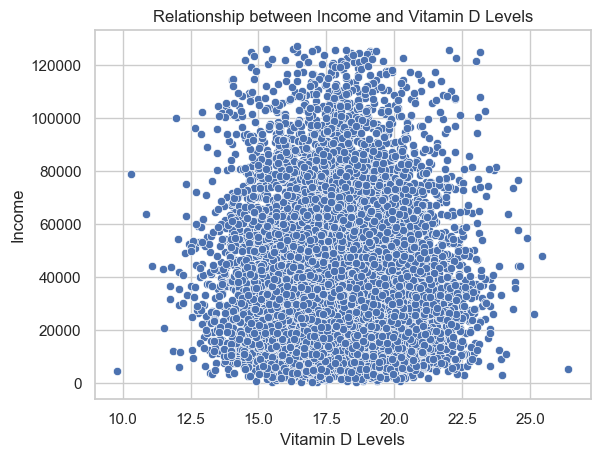

In [103]:
seaborn.set_theme(style='whitegrid')
plt.title("Relationship between Income and Vitamin D Levels")
seaborn.scatterplot(data=df, x="VitD_levels", y="Income")
plt.xlabel("Vitamin D Levels")

In [104]:
df.Income.describe()

count     10000.000000
mean      38846.797700
std       25249.784206
min         154.000000
25%       19598.250000
50%       33294.000000
75%       52898.500000
max      127026.000000
Name: Income, dtype: float64

In [105]:
df.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [108]:
# ### Chi-Square ###

In [110]:
# Following course material for chi-square, creating table (Course material, n.d.)
chi = pd.crosstab(df['ReAdmis'], df['Services'])
chi

Services,CT scan,MRI,blood work,intravenous
ReAdmis,,,,
no,737,232,3335,2027
yes,488,148,1930,1103


<Axes: xlabel='Services', ylabel='ReAdmis'>

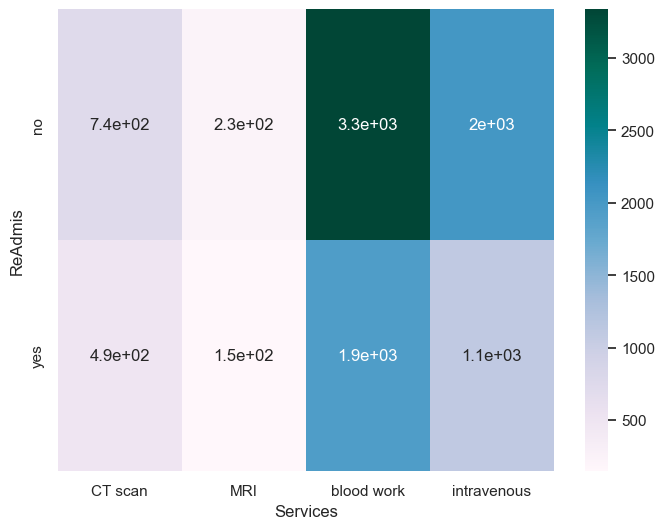

In [111]:
# Heatmap to visualize relationship (Course material, n.d.)
plt.figure(figsize=(8,6))
seaborn.heatmap(chi, annot=True, cmap="PuBuGn")

In [112]:
# Chi-square test for independence
c, p, dof, expected = chi2_contingency(chi)

In [116]:
# Print the p-value
print('P-value is: ', p)

P-value is:  0.03075281113212747


In [120]:
# interpret p-value
alpha = 0.05
if p <= alpha:
    print('Null is rejected')
else:
    print('Null can not be rejected')

Null is rejected
